<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks/blob/main/Dynamic_Circuits_%26_If_Statements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

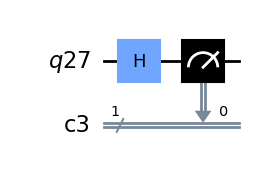

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

qc.h(qr[0])
qc.measure(qr[0], cr[0])


qc.draw("mpl")

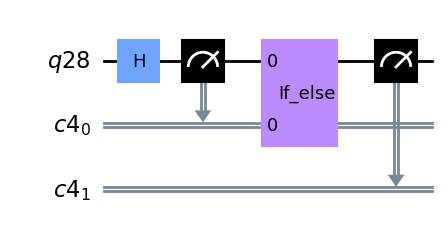

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(1)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# unpack the qubit and classical bits from the registers
(q0,) = qr
b0, b1 = cr

# apply Hadamard
qc.h(q0)
# measure
qc.measure(q0, b0)

# begin if test block. the contents of the block are executed if b0 == 1
with qc.if_test((b0, 1)):
    # if the condition is satisfied (b0 == 1), then flip the bit back to 0
    qc.x(q0)
# finally, measure q0 again
qc.measure(q0, b1)

qc.draw(output="mpl", idle_wires=False)

In [ ]:
from qiskit_aer import AerSimulator

# initialize the simulator
backend_sim = AerSimulator()

# run the circuit
reset_sim_job = backend_sim.run(qc)
# get the results
reset_sim_result = reset_sim_job.result()
# retrieve the bitstring counts
reset_sim_counts = reset_sim_result.get_counts()

print(f"Counts: {reset_sim_counts}")

Counts: {'00': 528, '01': 496}


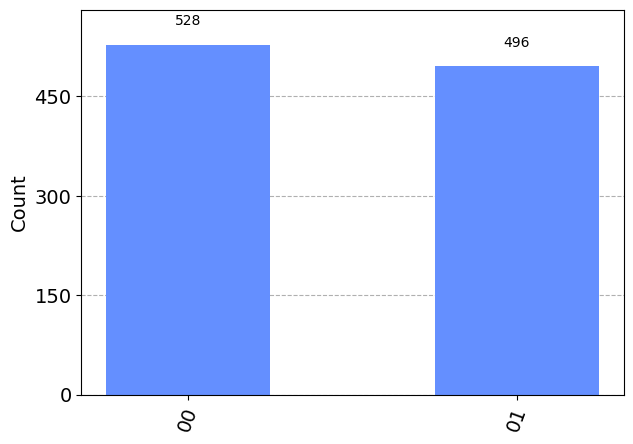

In [ ]:
from qiskit.visualization import *

# plot histogram
plot_histogram(reset_sim_counts)

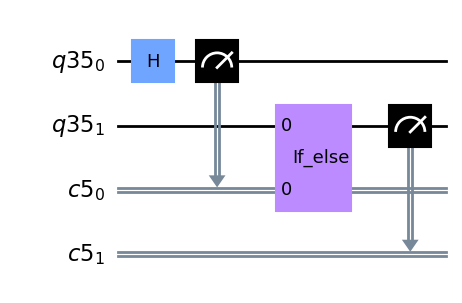

In [ ]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

q0, q1 = qr
b0, b1 = cr

qc.h(q0)
qc.measure(q0, b0)

####### your code goes here #######
# begin if test block. the contents of the block are executed if b0 == 0
with qc.if_test((b0, 0)):
    # if the condition is satisfied (b0 == 0), then flip the bit back to 1
    qc.x(q1)
# finally, measure q1 again

qc.measure(q1, b1)
qc.draw(output="mpl", idle_wires=False)

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile

controls = QuantumRegister(2, name="control")
target = QuantumRegister(1, name="target")

mid_measure = ClassicalRegister(2, name="mid")
final_measure = ClassicalRegister(1, name="final")

base = QuantumCircuit(controls, target, mid_measure, final_measure)
circuit = base

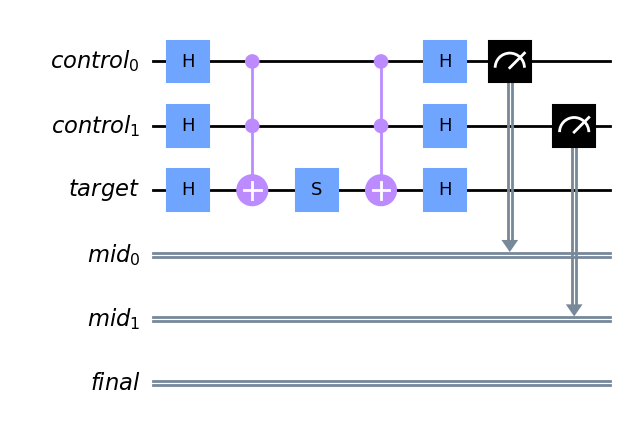

In [ ]:
def trial(circuit, target, controls, measures):
    "Probabilistically perform Rx(theta) on the target, where cos(theta) = 3/5."

    
    ####### your code goes here #######
    circuit.h(target)
    circuit.h(controls)
    circuit.ccx(*controls, target)
    circuit.s(target)
    circuit.ccx(*controls, target)
    circuit.h(controls)
    circuit.h(target)
    circuit.measure(controls, measures)

qc = base.copy_empty_like()
trial(qc, target, controls, mid_measure)
qc.draw("mpl", cregbundle=False)

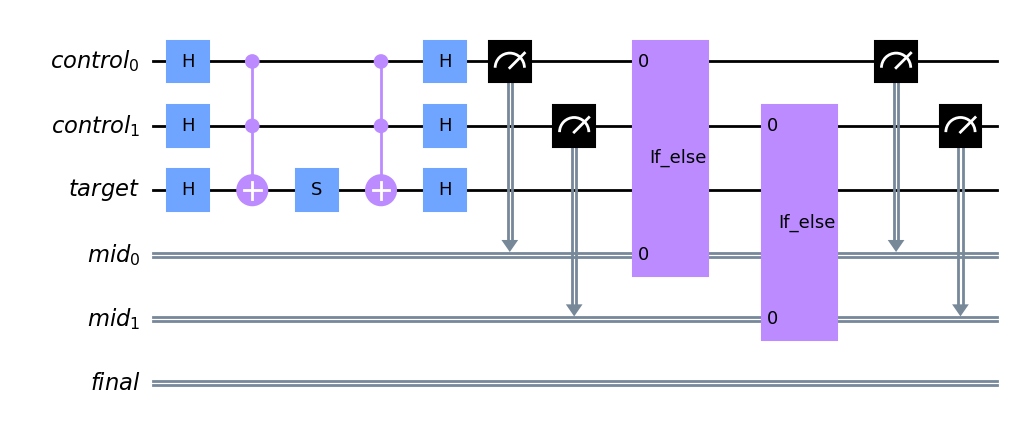

In [ ]:
def reset_controls(circuit:QuantumCircuit,controls:QuantumRegister,measures:ClassicalRegister):
    """Reset the control qubits if they are in |1>."""

    ####### your code goes here #######
    with circuit.if_test((mid_measure[0], 1)):
    # if the condition is satisfied (mid_measure[0] == 1), then flip control qubit 1
        circuit.x(controls[0])

    with circuit.if_test((mid_measure[1], 1)):
    # if the condition is satisfied (mid_measure[0] == 1), then flip control qubit 2
        circuit.x(controls[1])
# finally, measure control qubit again, where the if_test started

#qc.measure(controls[0], mid_measure[0])    
    
qc = base.copy_empty_like()
trial(qc, target, controls, mid_measure)
reset_controls(qc, controls, mid_measure)
qc.measure(controls, mid_measure)
qc.draw("mpl", cregbundle=False)

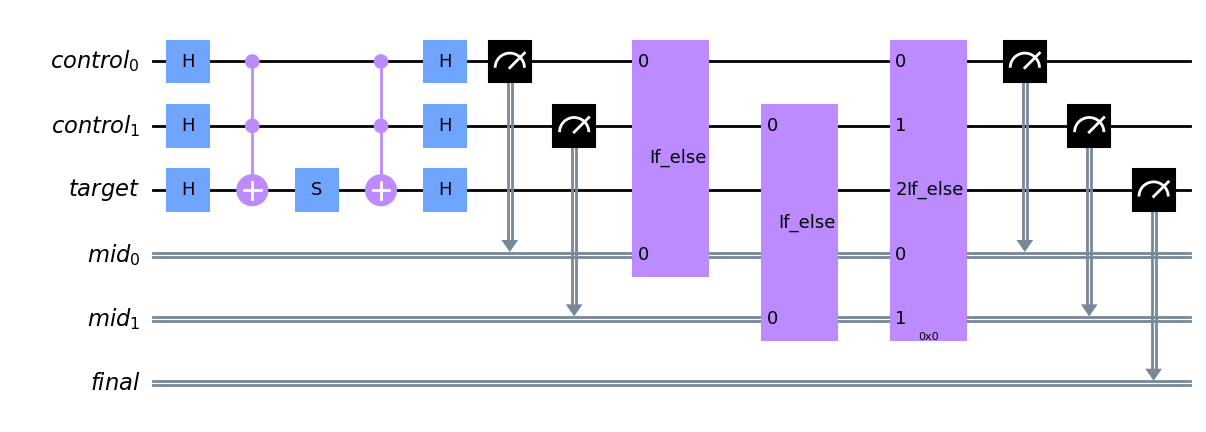

In [ ]:
# Set the maximum number of trials
max_trials = 2

# Create a clean circuit with the same structure (bits, registers, etc)
# as the initial base we set up.
circuit = base.copy_empty_like()

# The first trial does not need to reset its inputs, since the controls
# are guaranteed to start in the |0> state.
trial(circuit, target, controls, mid_measure)

# Manually add the rest of the trials.  In the future, we will be
# able to use a dynamic `while` loop to do this, but for now, we
# statically add each loop iteration with a manual condition check
# on each one.  This involves more classical synchronizations than
# the while loop, but will suffice for now.
for _ in range(max_trials - 1):
    reset_controls(circuit, controls, mid_measure)
    with circuit.if_test((mid_measure, 0b00)) as else_:
        # This is the success path, but Qiskit can't directly
        # represent a negative condition yet, so we have an
        # empty `true` block in order to use the `else` branch.
        pass
    with else_:
        # First reset the target.
        circuit.x(target)
        # Then repeat the trial.
        trial(circuit, target, controls, mid_measure)

# We need to measure the control qubits again to ensure we
# get their final results; this is a hardware limitation.
circuit.measure(controls, mid_measure)

# Finally, let's measure our target, to check that we're
# getting the rotation we desired.
circuit.measure(target, final_measure)

circuit.draw("mpl", cregbundle=False)

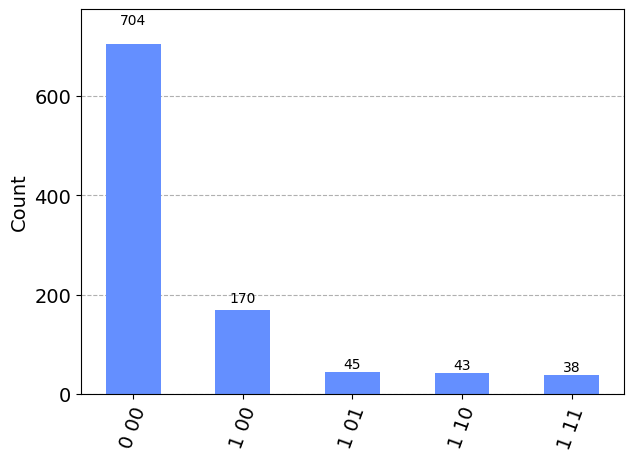

In [ ]:
sim = AerSimulator()
job = sim.run(circuit, shots=1000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

In [ ]:
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider()

In [ ]:
# here the provider details can be modified based on the accessible machines of interest.
from qiskit.providers.ibmq import IBMQ
hub = "qc-spring-23-3"
group = "group-4"
project = "recKKLk8qrlM6pfXX"

backend_name = "ibm_peekskill"
backend = provider.get_backend(backend_name, instance=f"qc-spring-23-3/group-4/recKKLk8qrlM6pfXX")
#ibmq_backend = 'ibm_peekskill'

print("The quantum computer for this session now is",ibmq_backend)

The quantum computer for this session now is ibm_peekskill


In [ ]:
from qiskit import transpile
from qiskit.transpiler import Target, InstructionProperties
from qiskit.circuit import Parameter

In [ ]:
qc_transpiled = transpile(circuit, backend)
job = backend.run(qc_transpiled, shots=1000, dynamic=True)

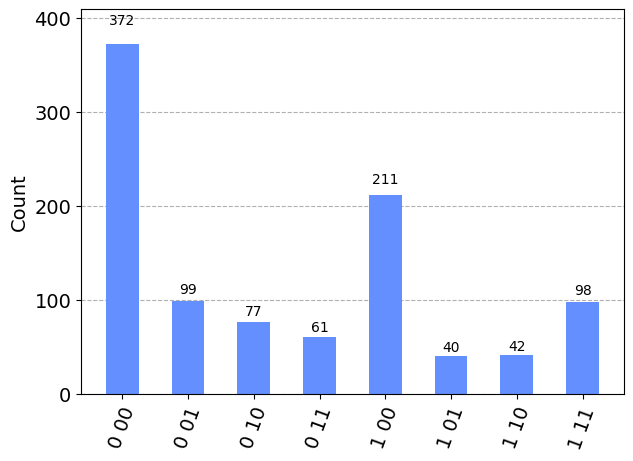

In [ ]:
counts = job.result().get_counts()

plot_histogram(counts)